# Autoencoder with Fashion MNIST

## Load data

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Define, train and save multiple models

In [3]:
from models import Model, Layer_Dense, Activation_ReLU, Loss_MeanSquaredError, Optimizer_Adam,Activation_Sigmoid, Accuracy_Regression, Layer_Dropout

def train_and_save_autoencoder(learning_rate, decay, epochs, batch_size, model_name_suffix):
    model = Model()

    model.add(Layer_Dense(784, 144)) 
    model.add(Activation_ReLU())
    model.add(Layer_Dense(144, 64))  
    model.add(Activation_ReLU())
    model.add(Layer_Dense(64, 144))
    model.add(Activation_ReLU())
    model.add(Layer_Dense(144, 784))  
    model.add(Activation_Sigmoid())  

    model.set(
        loss=Loss_MeanSquaredError(),
        optimizer=Optimizer_Adam(learning_rate=learning_rate, decay=decay),
        accuracy=Accuracy_Regression()
    )

    model.finalize()

    X_train_flattened = X_train.reshape(-1, 784)
    X_test_flattened = X_test.reshape(-1, 784)

    model.train(X_train_flattened, X_train_flattened, validation_data=(X_test_flattened, X_test_flattened),
                epochs=epochs, batch_size=batch_size, print_every=100)

    model_filename = f'autoencoder_{model_name_suffix}.model'
    model.save(model_filename)
    print(f"Model saved as {model_filename}")

    return model

hyperparams_sets = [
    {'learning_rate': 0.001, 'decay': 1e-5, 'epochs': 10, 'batch_size': 128},
    {'learning_rate': 0.0005, 'decay': 1e-4, 'epochs': 20, 'batch_size': 64},
    {'learning_rate': 0.0001, 'decay': 1e-3, 'epochs': 5, 'batch_size': 256},
]


for i, hyperparams in enumerate(hyperparams_sets):
    suffix = f"lr{hyperparams['learning_rate']}_decay{hyperparams['decay']}_epochs{hyperparams['epochs']}_batch{hyperparams['batch_size']}"
    train_and_save_autoencoder(**hyperparams, model_name_suffix=suffix)


epoch: 1
validation, acc: 392.671, loss: 0.028
epoch: 2
validation, acc: 394.064, loss: 0.022
epoch: 3
validation, acc: 395.024, loss: 0.020
epoch: 4
validation, acc: 395.368, loss: 0.018
epoch: 5
validation, acc: 395.763, loss: 0.018
epoch: 6
validation, acc: 395.987, loss: 0.017
epoch: 7
validation, acc: 396.223, loss: 0.016
epoch: 8
validation, acc: 396.225, loss: 0.015
epoch: 9
validation, acc: 396.329, loss: 0.015
epoch: 10
validation, acc: 396.390, loss: 0.014
Model saved as autoencoder_lr0.001_decay1e-05_epochs10_batch128.model
epoch: 1
validation, acc: 391.677, loss: 0.028
epoch: 2
validation, acc: 394.069, loss: 0.023
epoch: 3
validation, acc: 394.608, loss: 0.021
epoch: 4
validation, acc: 394.987, loss: 0.020
epoch: 5
validation, acc: 395.311, loss: 0.019
epoch: 6
validation, acc: 395.606, loss: 0.017
epoch: 7
validation, acc: 395.806, loss: 0.017
epoch: 8
validation, acc: 395.977, loss: 0.016
epoch: 9
validation, acc: 396.127, loss: 0.016
epoch: 10
validation, acc: 396.238, 

## Define autoencoder model with regularization

In [5]:
from models import Model, Layer_Dense, Activation_ReLU, Loss_MeanSquaredError, Optimizer_Adam,Activation_Sigmoid, Accuracy_Regression, Layer_Dropout

model = Model()

model.add(Layer_Dense(784, 144)) 
model.add(Activation_ReLU())
model.add(Layer_Dense(144, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))  
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.1))
model.add(Layer_Dense(64, 144, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.1))
model.add(Layer_Dense(144, 784))  
model.add(Activation_Sigmoid())  

model.set(
    loss=Loss_MeanSquaredError(),
    optimizer=Optimizer_Adam(learning_rate=1e-3, decay=1e-5),
    accuracy=Accuracy_Regression()

)

model.finalize()


In [6]:
X_train_flattened = X_train.reshape(-1, 784) 
X_test_flattened = X_test.reshape(-1, 784)

print(X_train_flattened.shape)

model.train(X_train_flattened, X_train_flattened, validation_data=(X_test_flattened, X_test_flattened), epochs=10, batch_size=128, print_every=1)

model.save('autoencoder_regularization_lr0.001_decay13-05_epochs10_batch128.model')


(60000, 784)
epoch: 1
training, epoch: 1, acc: 381.746, loss: 0.064 (data_loss: 0.060, reg_loss: 0.004), lr: 0.0009953418003742485
validation, acc: 390.536, loss: 0.037
epoch: 2
training, epoch: 2, acc: 392.101, loss: 0.035 (data_loss: 0.032, reg_loss: 0.003), lr: 0.0009907169818797862
validation, acc: 393.519, loss: 0.027
epoch: 3
training, epoch: 3, acc: 394.031, loss: 0.030 (data_loss: 0.027, reg_loss: 0.003), lr: 0.00098613494270556
validation, acc: 394.189, loss: 0.025
epoch: 4
training, epoch: 4, acc: 394.566, loss: 0.028 (data_loss: 0.026, reg_loss: 0.002), lr: 0.00098159509202454
validation, acc: 393.289, loss: 0.023
epoch: 5
training, epoch: 5, acc: 394.943, loss: 0.027 (data_loss: 0.025, reg_loss: 0.002), lr: 0.0009770968498397563
validation, acc: 394.679, loss: 0.023
epoch: 6
training, epoch: 6, acc: 395.236, loss: 0.026 (data_loss: 0.024, reg_loss: 0.002), lr: 0.0009726396467372803
validation, acc: 394.259, loss: 0.021
epoch: 7
training, epoch: 7, acc: 395.588, loss: 0.025 

## Plot learning curves

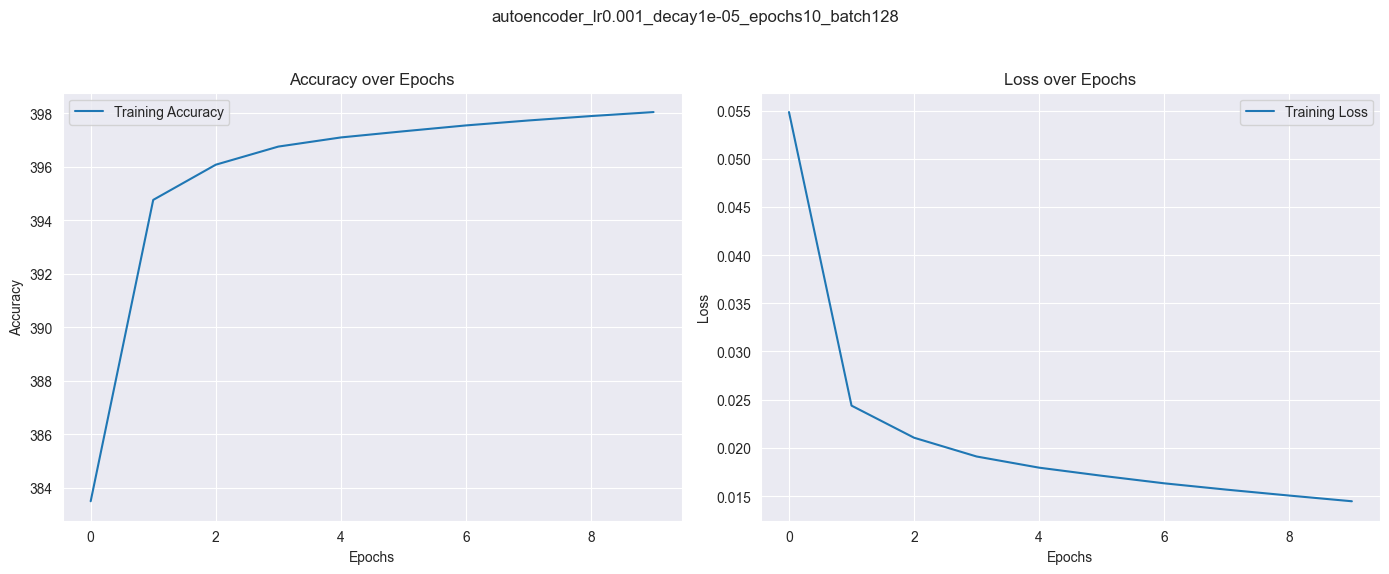

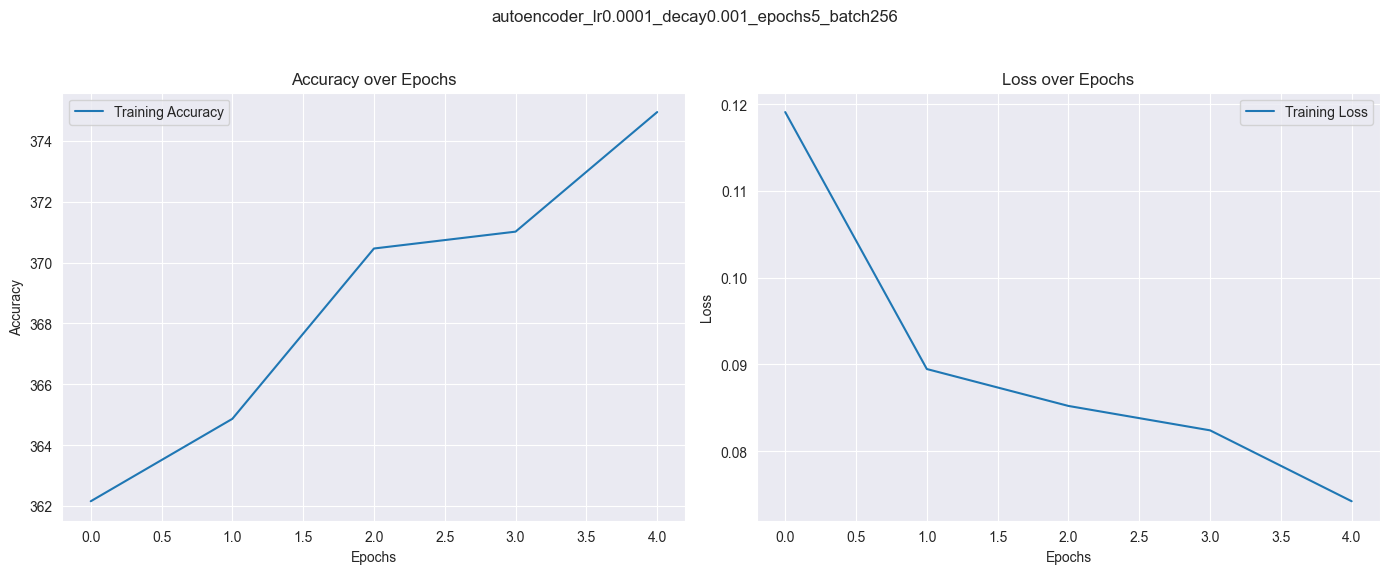

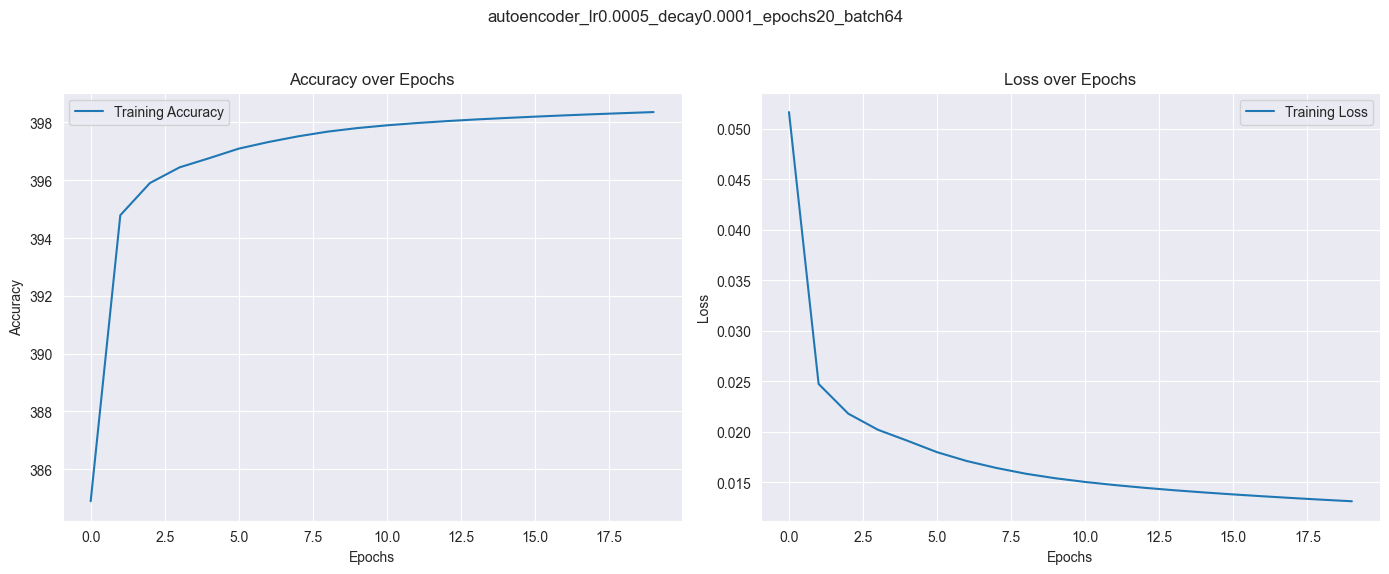

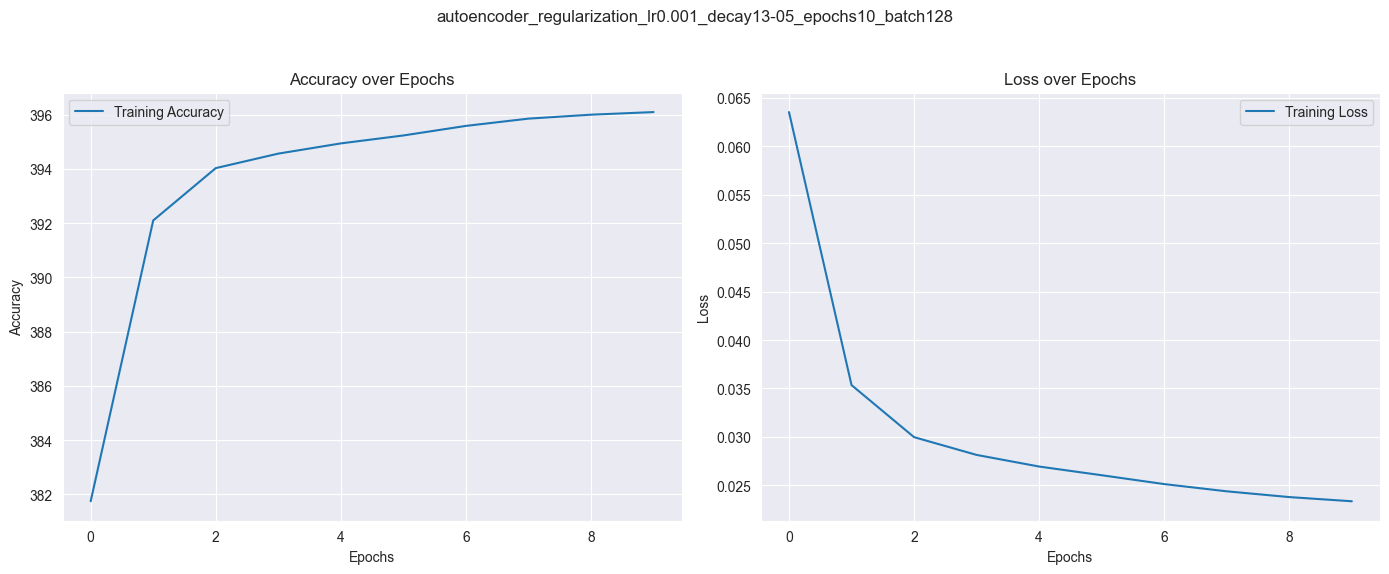

In [16]:
def plot_learning_curves(model, title):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(model.train_acc_history, label='Training Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(model.train_loss_history, label='Training Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.suptitle(title)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

model_filenames = ['autoencoder_lr0.001_decay1e-05_epochs10_batch128.model',
                   'autoencoder_lr0.0001_decay0.001_epochs5_batch256.model',
                   'autoencoder_lr0.0005_decay0.0001_epochs20_batch64.model', 'autoencoder_regularization_lr0.001_decay13-05_epochs10_batch128.model']

for filename in model_filenames:
    model = Model.load(filename)
    model_name = filename.split('.model')[0]
    plot_learning_curves(model, model_name)


## Extract and visualize hidden layer representations

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_activations(model, X, y, labels, num_examples=5):
    for n in range(num_examples):
        sample = X[n]

        activations = model.get_activations(sample.reshape(1, -1))

        num_layers = len(activations)

        rows = 2 
        cols = int(np.ceil(num_layers / rows))

        fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
        fig.suptitle(f'Class {labels[y[n]]}', fontsize=16)

        for i, activation in enumerate(activations):
            ax = axes.flat[i] if num_layers > 1 else axes


            if np.sqrt(activation.shape[1]) % 1 == 0:
                side = int(np.sqrt(activation.shape[1]))
                reshaped_activation = activation.reshape(side, side)
                cax = ax.imshow(reshaped_activation, cmap='viridis')
            else:
                ax.plot(activation[0])
                ax.set_title(f"Layer {i+1} Activation")
                fig.colorbar(cax, ax=ax)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()



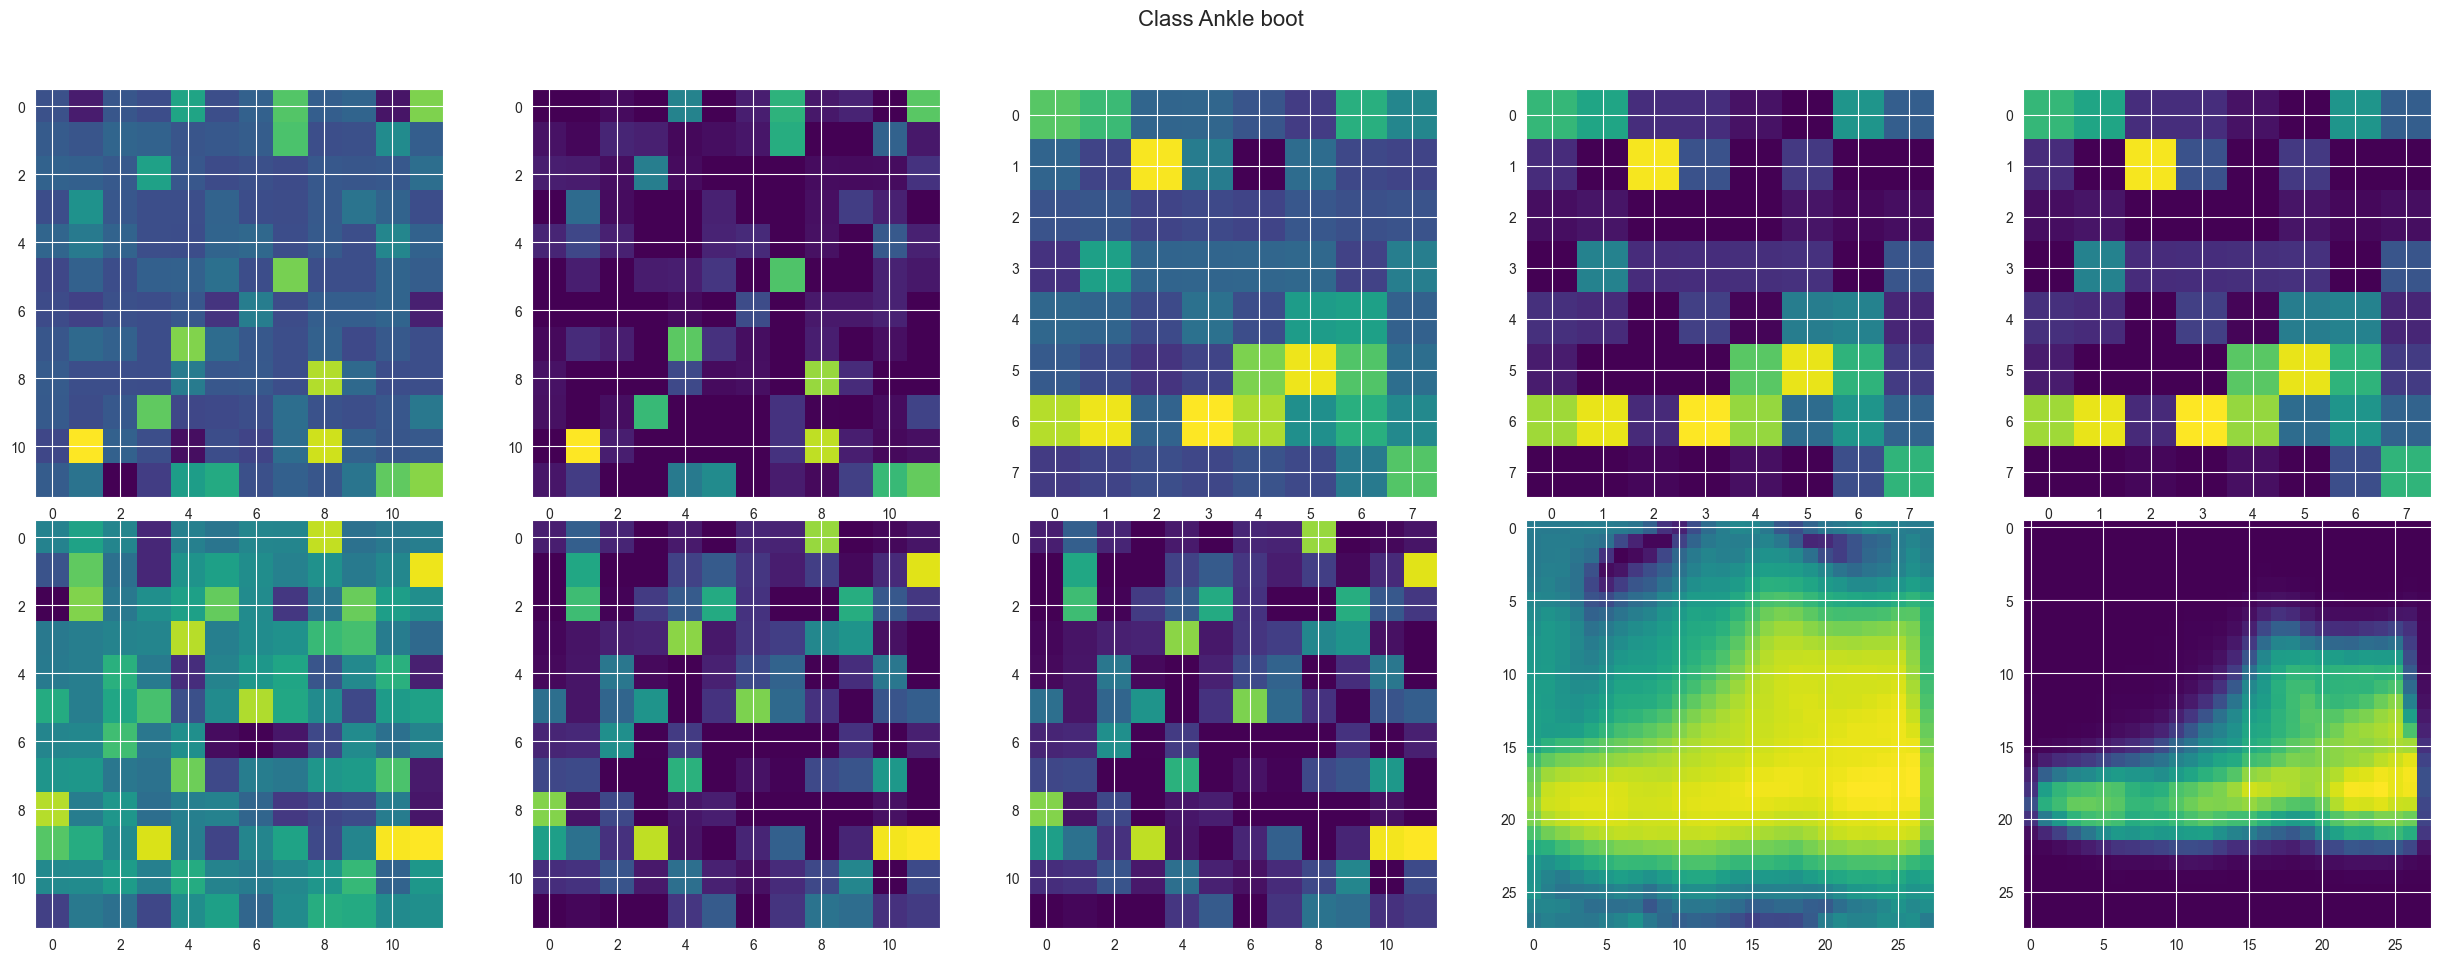

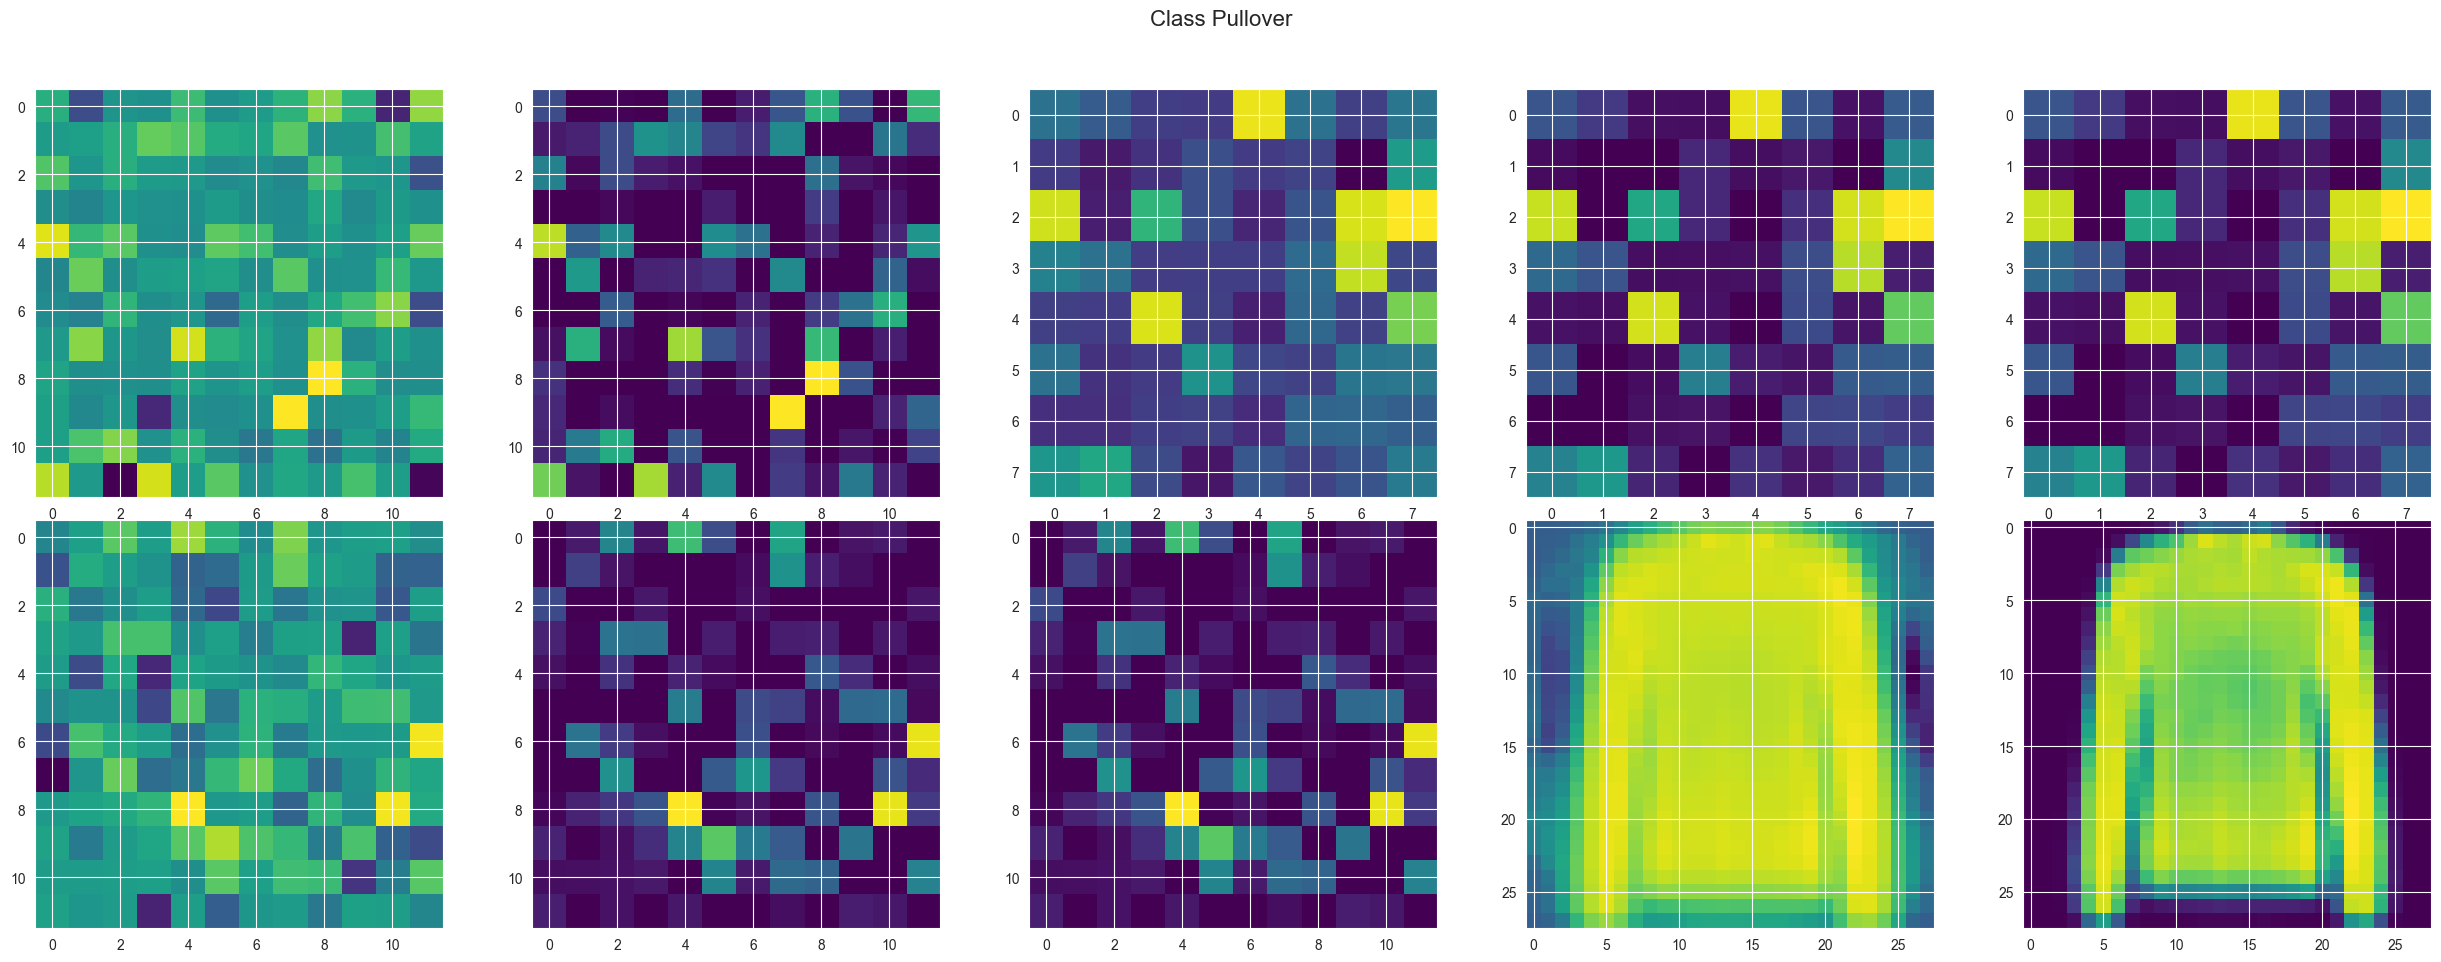

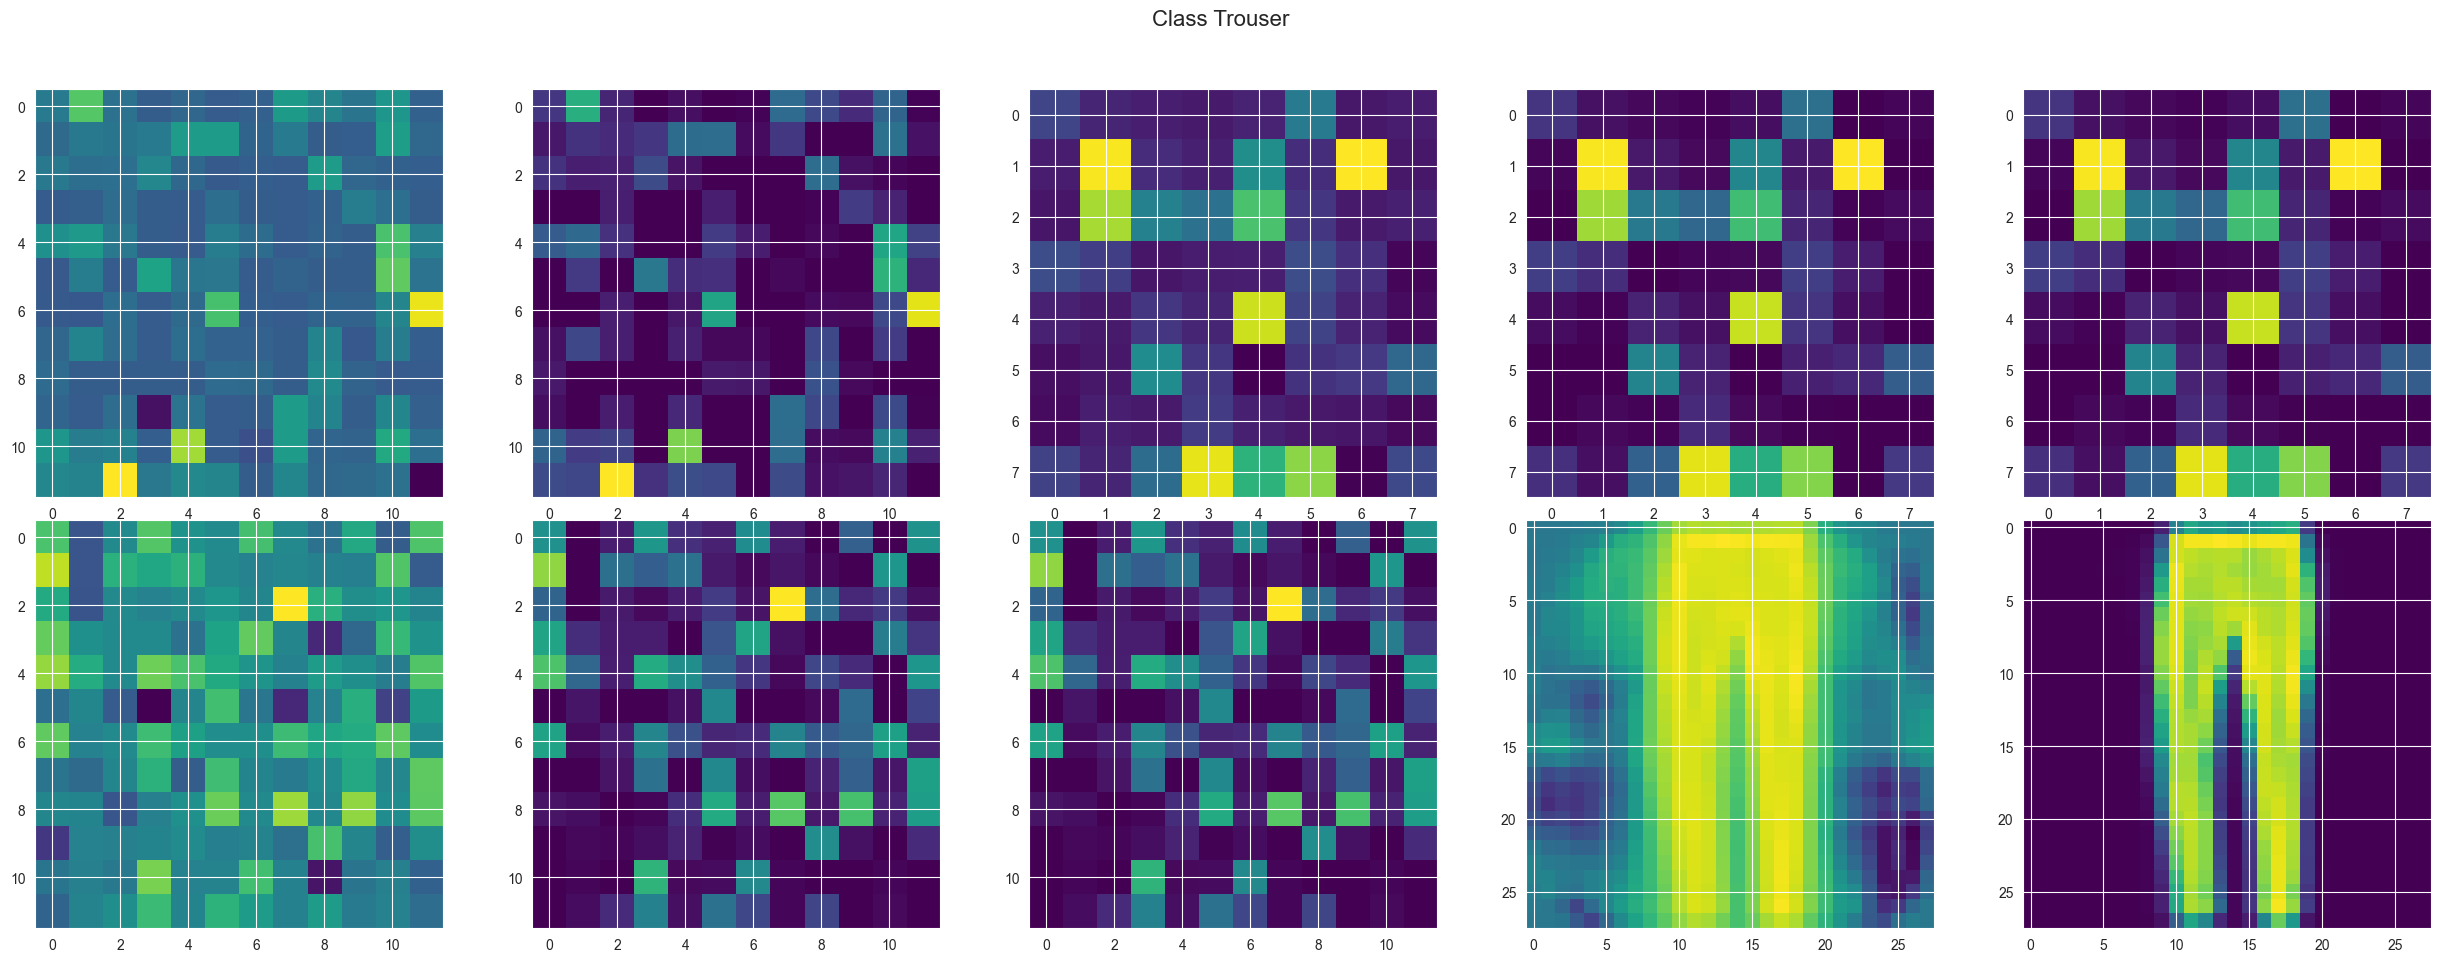

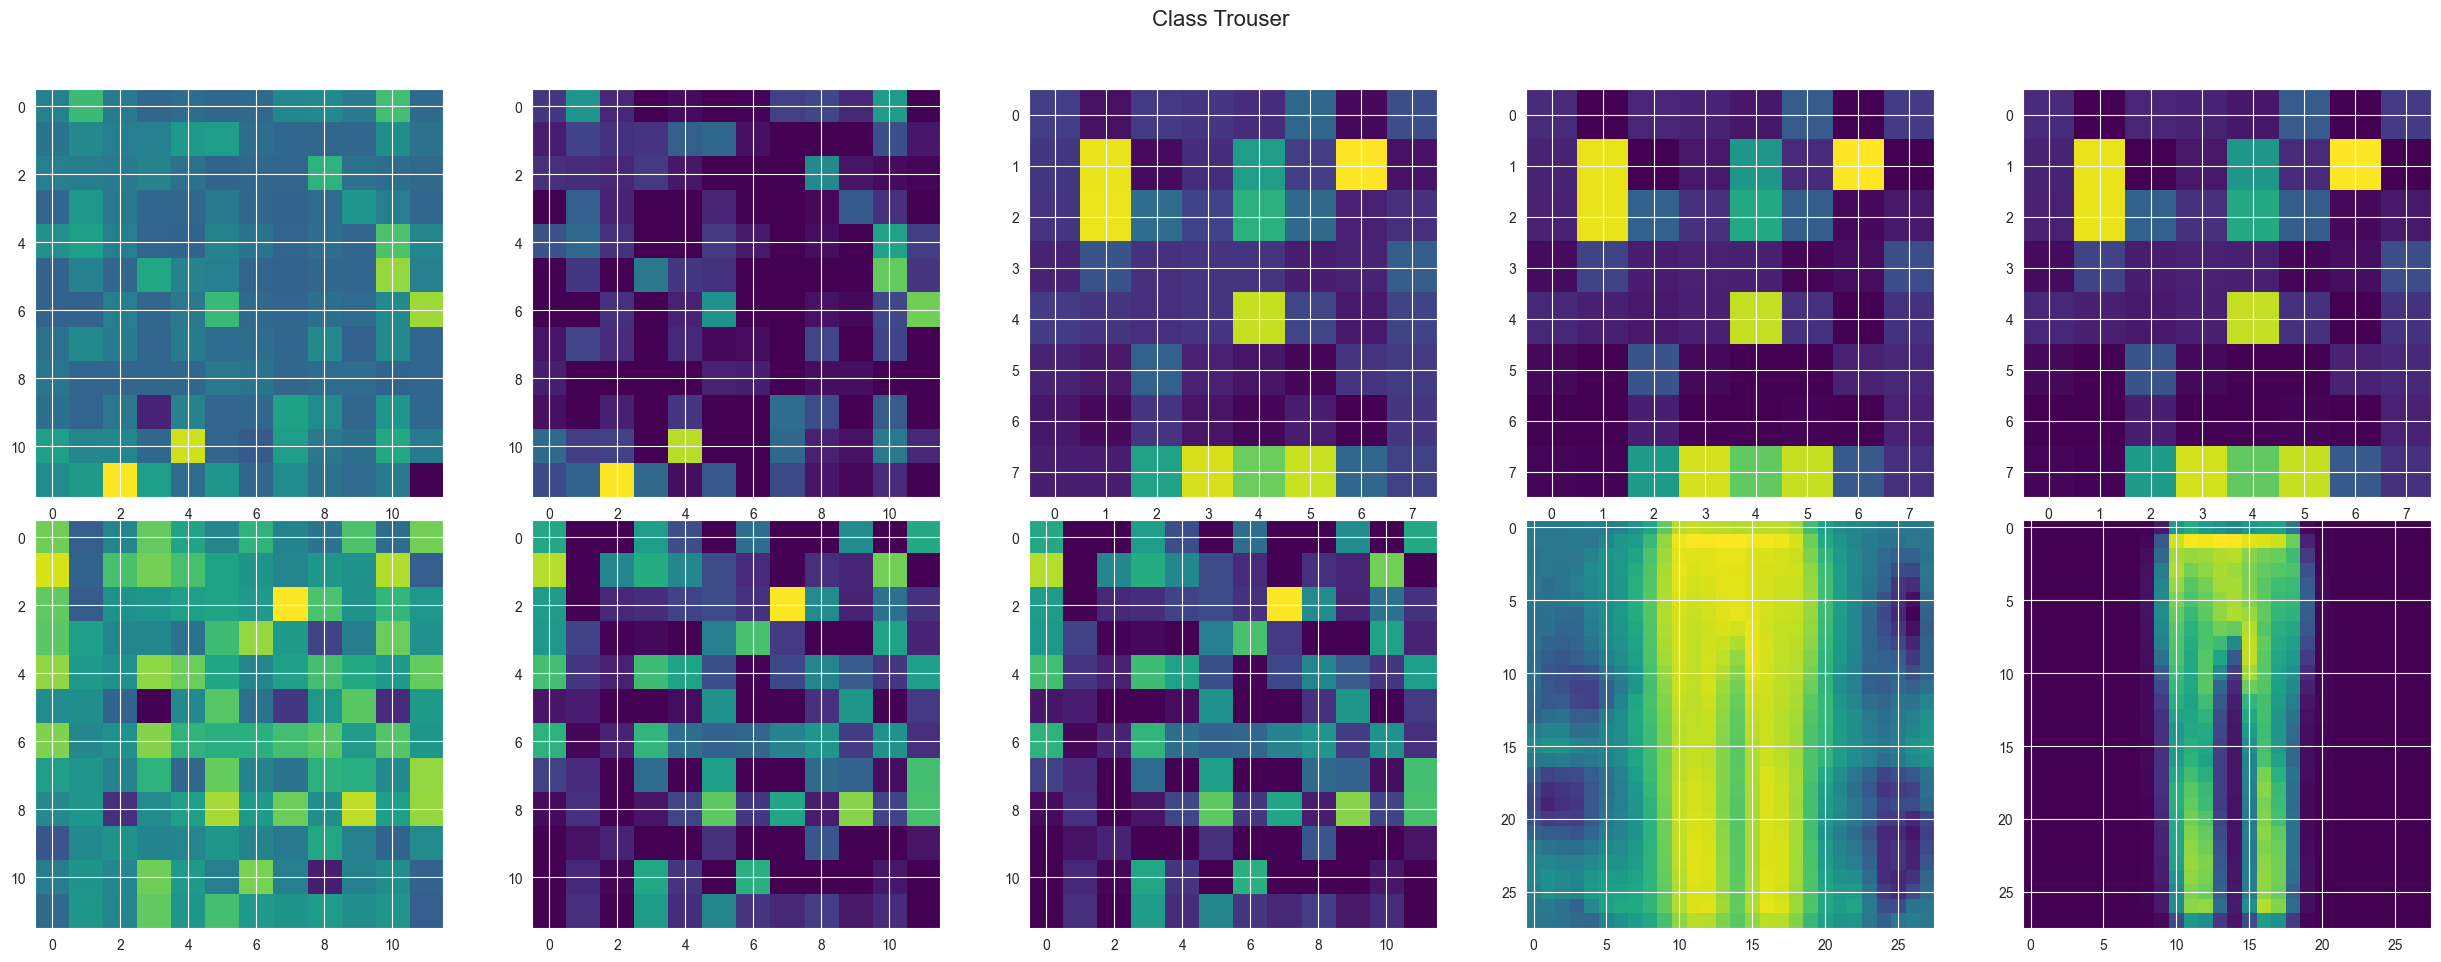

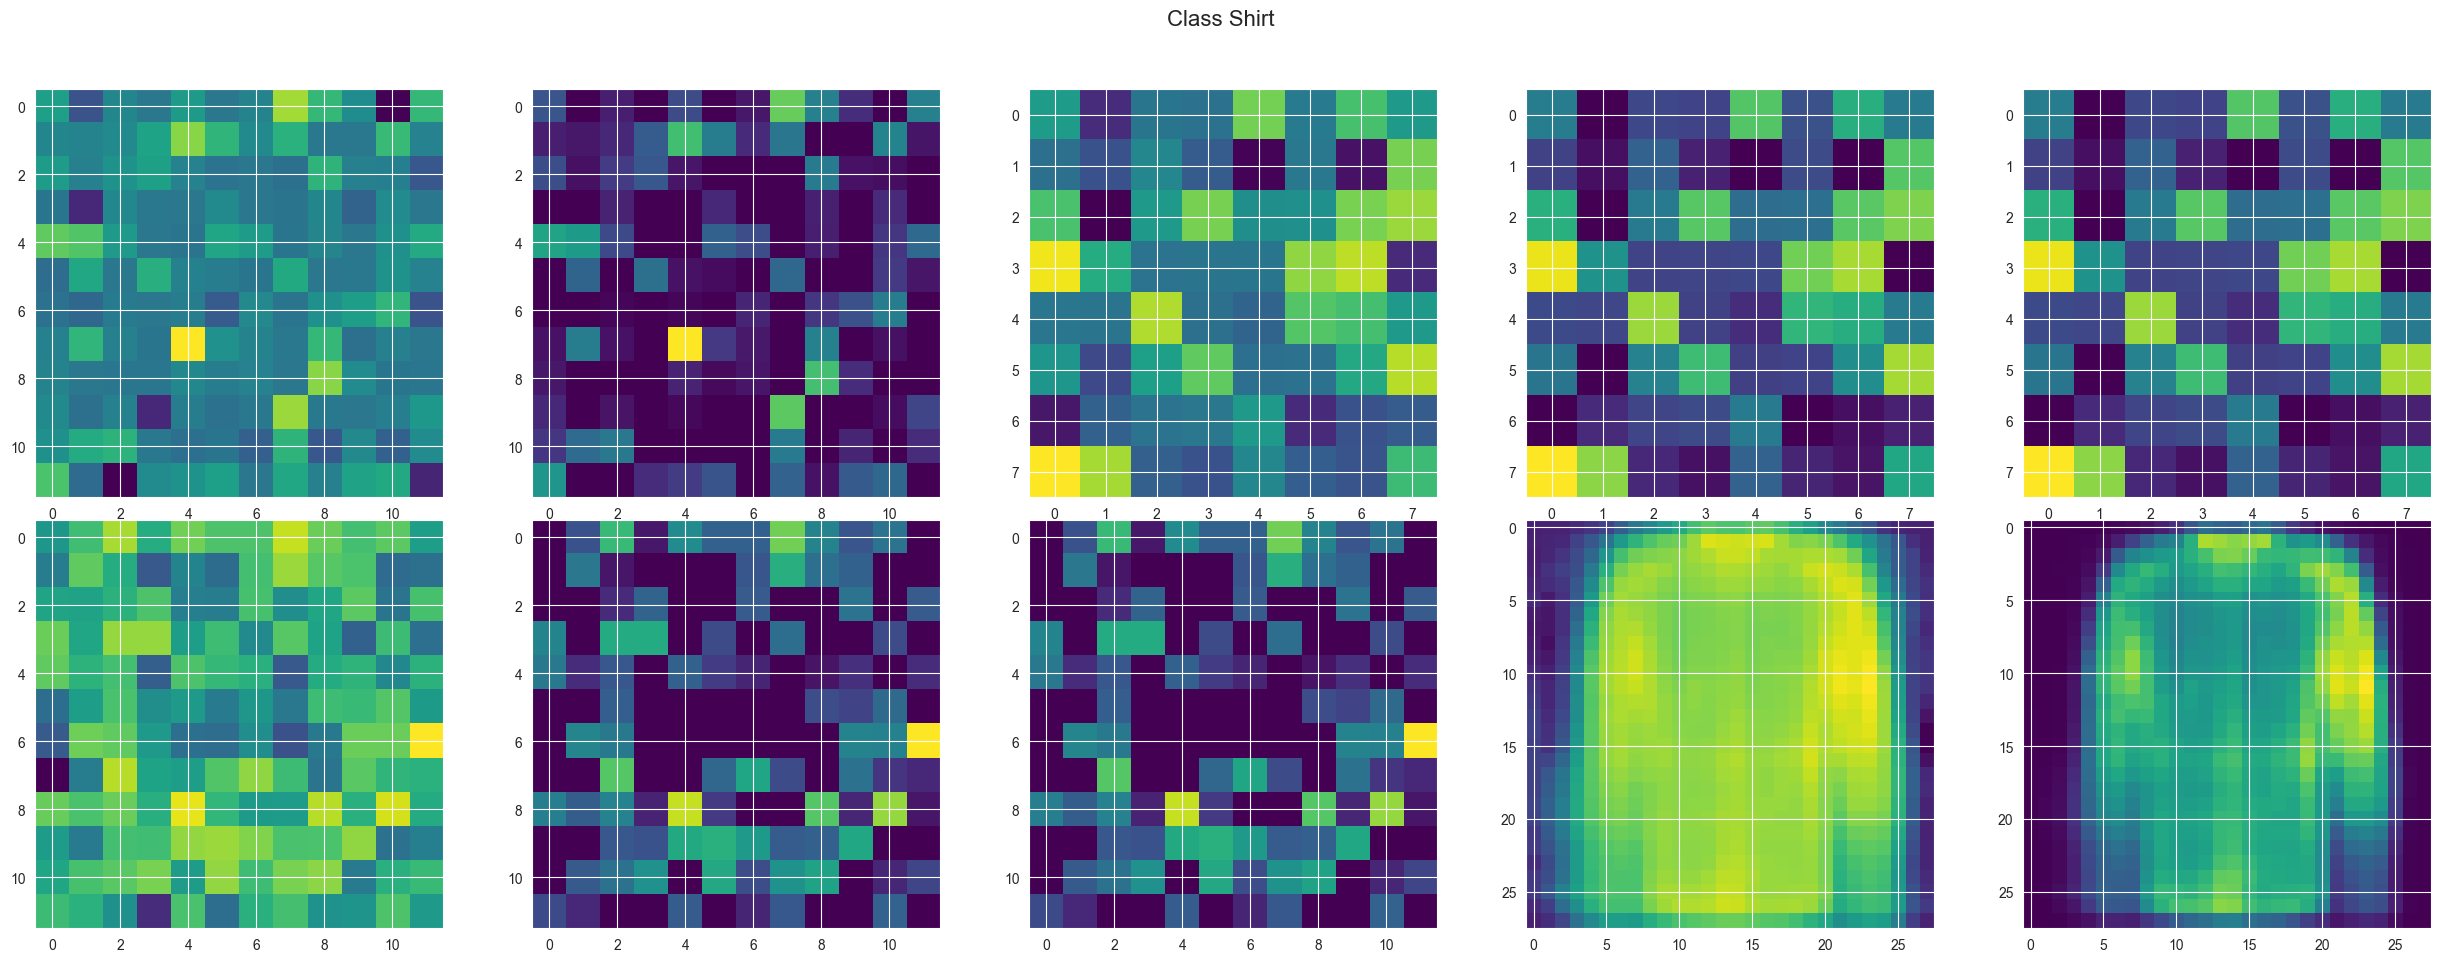

In [48]:
# model = Model.load('autoencoder_lr0.001_decay1e-05_epochs10_batch128.model')
# model = Model.load('autoencoder_lr0.0001_decay0.001_epochs5_batch256.model')
# model = Model.load('autoencoder_lr0.0005_decay0.0001_epochs20_batch64.model')
model = Model.load('autoencoder_regularization_lr0.001_decay13-05_epochs10_batch128.model')
visualize_activations(model, X_test_flattened, y_test, labels)

## Visualize unseen data in a space of low dimensionality

C:\Users\JakubSyska\.virtualenvs\NeuralNetworksLab1\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


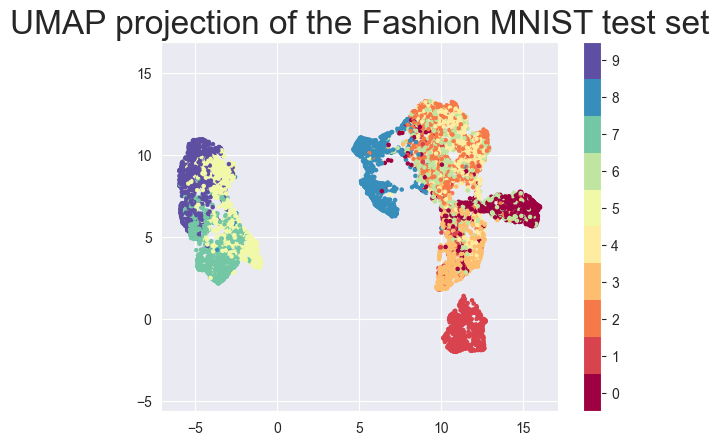

In [23]:
from umap import UMAP

latent_space_representations = model.get_latent_space_representations(X_test_flattened, 4)

reducer = UMAP(random_state=42)

embedding = reducer.fit_transform(latent_space_representations)

plt.scatter(embedding[:, 0], embedding[:, 1], c=y_test, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Fashion MNIST test set', fontsize=24)
plt.show()


C:\Users\JakubSyska\.virtualenvs\NeuralNetworksLab1\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


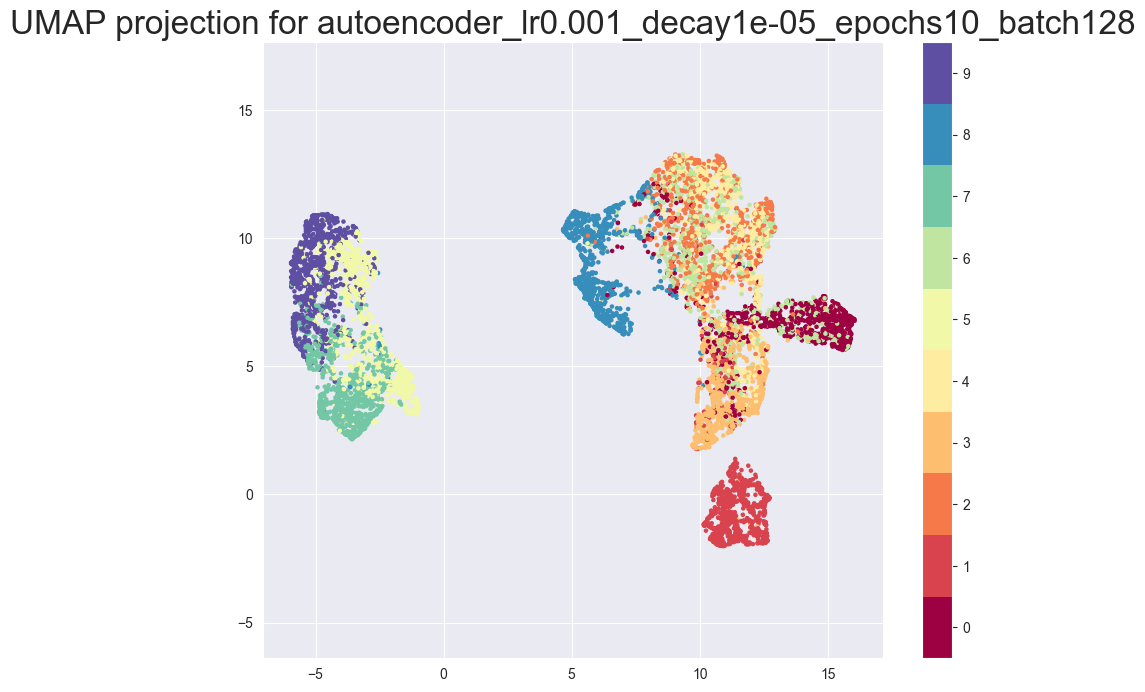

C:\Users\JakubSyska\.virtualenvs\NeuralNetworksLab1\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


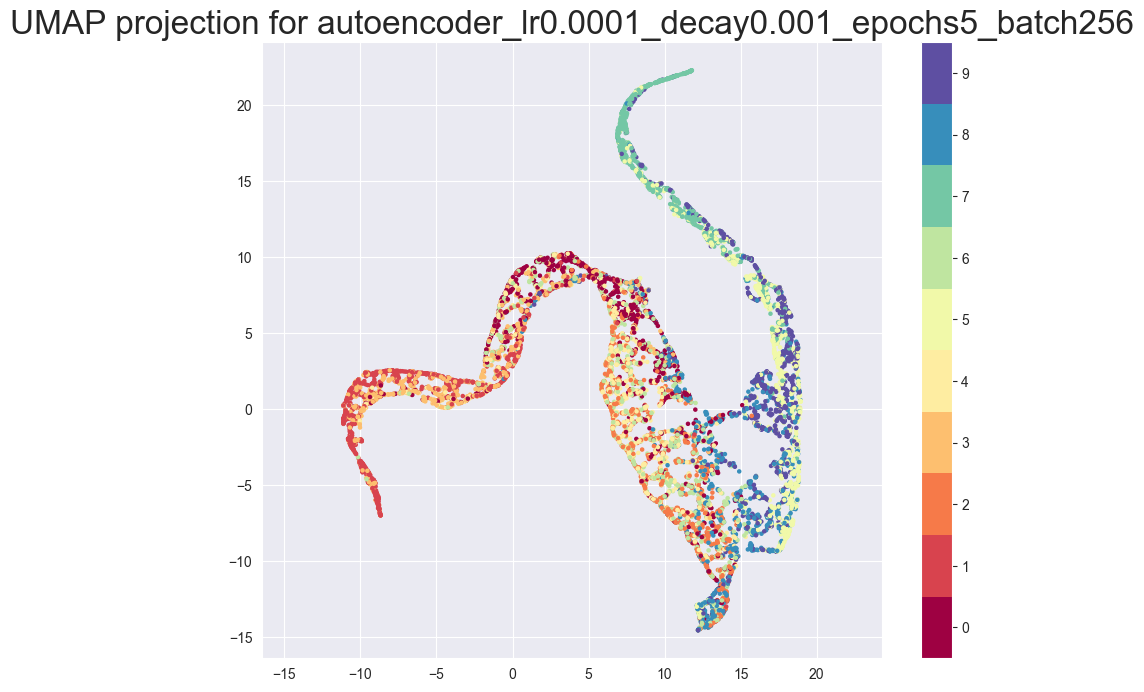

C:\Users\JakubSyska\.virtualenvs\NeuralNetworksLab1\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


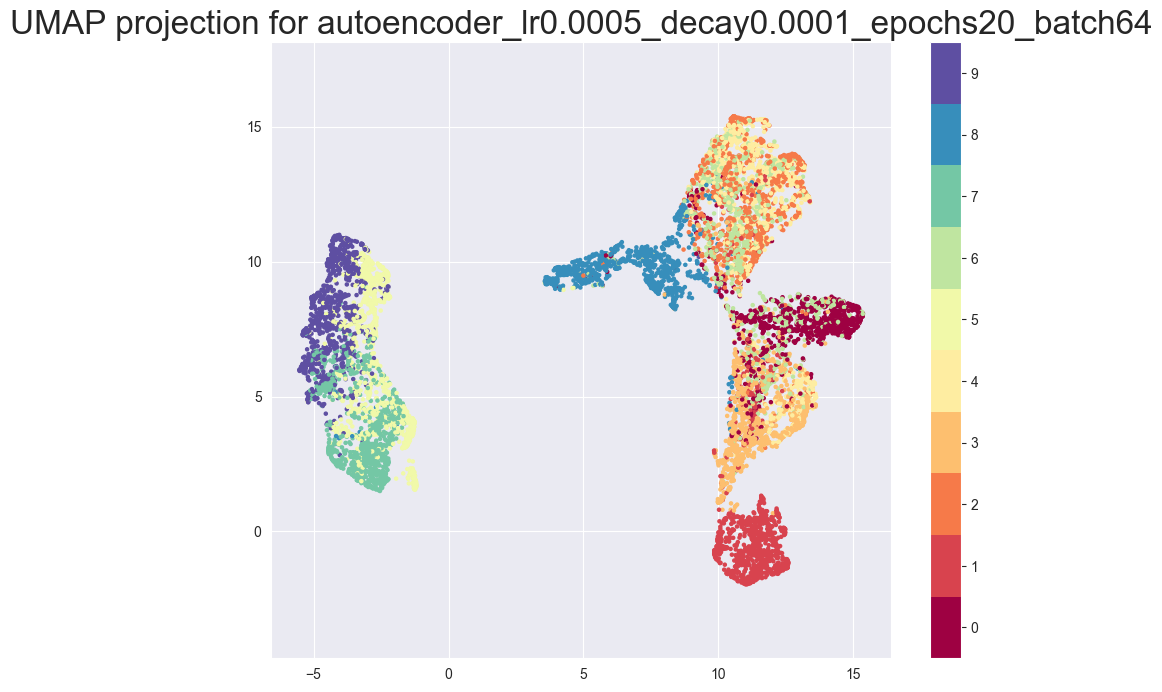

C:\Users\JakubSyska\.virtualenvs\NeuralNetworksLab1\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


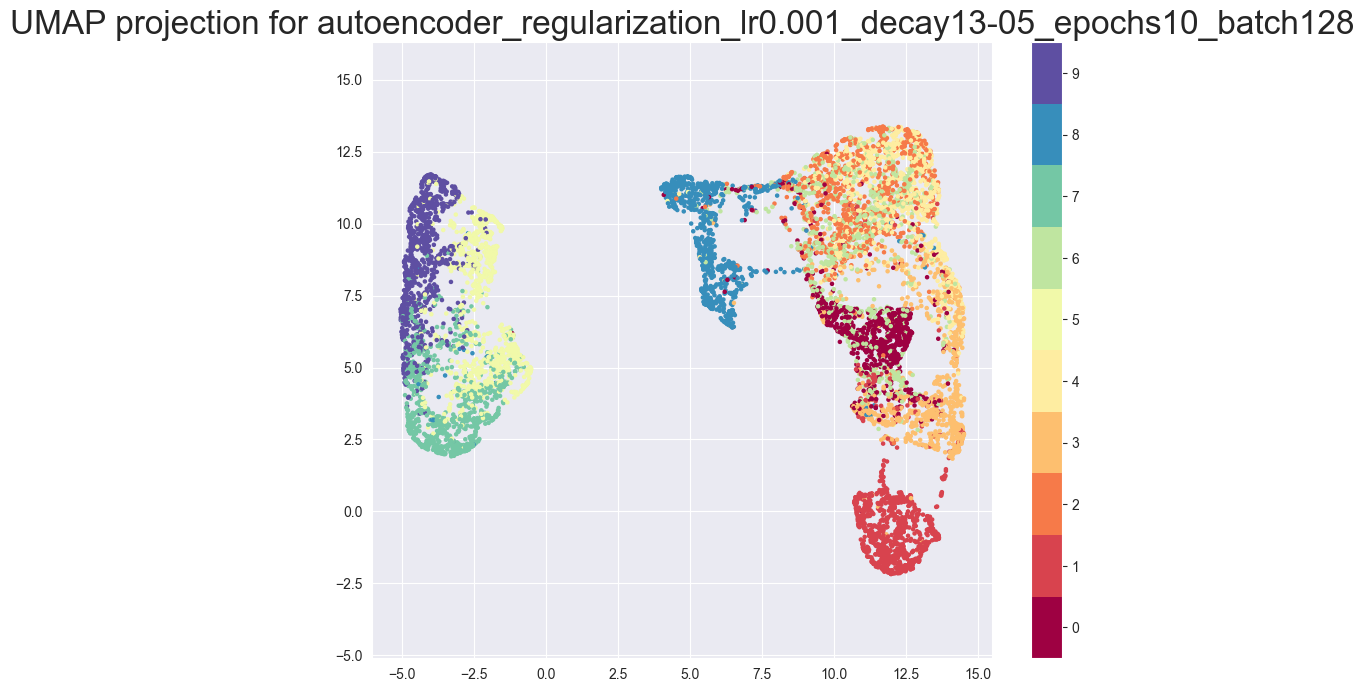

In [24]:
from umap import UMAP

def visualize_umap(model, X, y, latent_layer_index, title):
    # Extract latent space representations
    latent_space_representations = model.get_latent_space_representations(X, latent_layer_index)

    reducer = UMAP(random_state=42)

    embedding = reducer.fit_transform(latent_space_representations)

    plt.figure(figsize=(10, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title(title, fontsize=24)
    plt.show()

for filename in model_filenames:
    model = Model.load(filename)

    model_name = filename.split('.model')[0]

    visualize_umap(model, X_test_flattened, y_test, latent_layer_index=4, title=f'UMAP projection for {model_name}')


In [44]:
from models import Model, Layer_Dense, Activation_ReLU, Loss_MeanSquaredError, Optimizer_Adam,Activation_Sigmoid, Accuracy_Regression, Activation_Softmax, Loss_CategoricalCrossentropy, Accuracy_Categorical, Layer_Dropout

modelClassification = Model()

modelClassification.add(Layer_Dense(784, 128)) 
modelClassification.add(Activation_ReLU())
modelClassification.add(Layer_Dense(128, 64, weight_regularizer_l2=0, bias_regularizer_l2=0))  
modelClassification.add(Activation_ReLU())
# modelClassification.add(Layer_Dropout(0.1))
# modelClassification.add(Layer_Dense(64, 64, weight_regularizer_l2=0, bias_regularizer_l2=0))
# modelClassification.add(Activation_ReLU())
modelClassification.add(Layer_Dense(64, 10))  
modelClassification.add(Activation_Softmax())  

modelClassification.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=1e-3, decay=1e-7),
    accuracy=Accuracy_Categorical()

)

modelClassification.finalize()

modelClassification.train(X_train_flattened, y_train, validation_data=(X_test_flattened, y_test), epochs=15, batch_size=128, print_every=100)

model.save('autoencoder_classification.model')


epoch: 1
validation, acc: 0.791, loss: 0.576
epoch: 2
validation, acc: 0.825, loss: 0.492
epoch: 3
validation, acc: 0.838, loss: 0.450
epoch: 4
validation, acc: 0.844, loss: 0.425
epoch: 5
validation, acc: 0.852, loss: 0.407
epoch: 6
validation, acc: 0.859, loss: 0.395
epoch: 7
validation, acc: 0.862, loss: 0.383
epoch: 8
validation, acc: 0.863, loss: 0.378
epoch: 9
validation, acc: 0.866, loss: 0.371
epoch: 10
validation, acc: 0.868, loss: 0.365
epoch: 11
validation, acc: 0.866, loss: 0.364
epoch: 12
validation, acc: 0.868, loss: 0.361
epoch: 13
validation, acc: 0.870, loss: 0.355
epoch: 14
validation, acc: 0.872, loss: 0.354
epoch: 15
validation, acc: 0.871, loss: 0.357


In [47]:
from models import Model, Layer_Dense, Activation_ReLU, Loss_CategoricalCrossentropy, Accuracy_Categorical, Activation_Softmax

def train_classifier_on_encoded_data(autoencoder_model, X_train, y_train, X_test, y_test, epochs, batch_size):
    encoded_train = autoencoder_model.get_latent_space_representations(X_train, latent_layer_index=2)
    encoded_test = autoencoder_model.get_latent_space_representations(X_test, latent_layer_index=2)

    modelEncoded = Model()

    modelEncoded.add(Layer_Dense(64, 128)) 
    modelEncoded.add(Activation_ReLU())
    modelEncoded.add(Layer_Dense(128, 10))  
    modelEncoded.add(Activation_Softmax())  

    modelEncoded.set(
        loss=Loss_CategoricalCrossentropy(),
        optimizer=Optimizer_Adam(learning_rate=1e-3, decay=1e-7),
        accuracy=Accuracy_Categorical()
    )

    modelEncoded.finalize()
    modelEncoded.train(encoded_train, y_train, validation_data=(encoded_test, y_test), epochs=epochs, batch_size=batch_size, print_every=100)

    return modelEncoded

autoencoder_model = Model.load('autoencoder_lr0.001_decay1e-05_epochs10_batch128.model')
modelEncoded = train_classifier_on_encoded_data(autoencoder_model, X_train_flattened, y_train, X_test_flattened, y_test, epochs=15, batch_size=128)

modelEncoded.save('autoencoder_encoded_classification.model')


epoch: 1
validation, acc: 0.778, loss: 0.603
epoch: 2
validation, acc: 0.796, loss: 0.551
epoch: 3
validation, acc: 0.807, loss: 0.524
epoch: 4
validation, acc: 0.816, loss: 0.506
epoch: 5
validation, acc: 0.821, loss: 0.491
epoch: 6
validation, acc: 0.823, loss: 0.482
epoch: 7
validation, acc: 0.827, loss: 0.473
epoch: 8
validation, acc: 0.829, loss: 0.466
epoch: 9
validation, acc: 0.832, loss: 0.458
epoch: 10
validation, acc: 0.834, loss: 0.454
epoch: 11
validation, acc: 0.835, loss: 0.453
epoch: 12
validation, acc: 0.837, loss: 0.449
epoch: 13
validation, acc: 0.838, loss: 0.445
epoch: 14
validation, acc: 0.839, loss: 0.443
epoch: 15
validation, acc: 0.841, loss: 0.441
